This Is The Section For Classifier

In [ ]:
import numpy as np
import pandas as pd

import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log,sqrt
import re
%matplotlib inline


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


In [ ]:
mails = pd.read_csv('spam.csv',encoding='latin-1')
mails.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
totalmails = 4825 + 747
trainIndex , testIndex = list(), list()
for i in range(mails.shape[0]):
  if np.random.uniform(0,1) < 0.75:
    trainIndex += {i}
  else:
    testIndex += {i}


trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [ ]:
trainData.reset_index(inplace=True)
trainData.drop(['index'],axis=1,inplace=True)
trainData.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
testData.reset_index(inplace=True)
testData.drop(['index'],axis=1,inplace=True)
testData.head()

,Category,Message
0,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
1,ham,Fine if thatÂs the way u feel. ThatÂs the wa...
2,spam,England v Macedonia - dont miss the goals/team...
3,ham,"I'm back &amp; we're packing the car now, I'll..."
4,ham,"Wait that's still not all that clear, were you..."


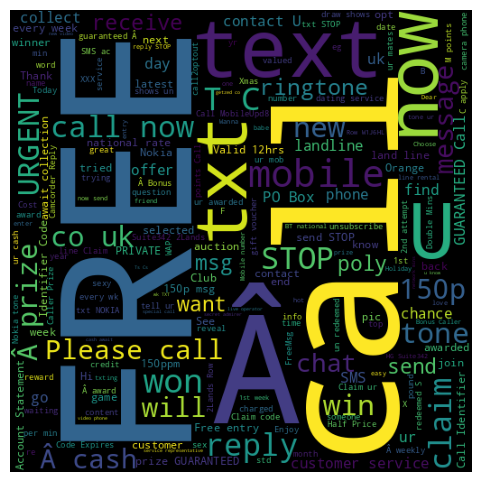

In [ ]:
spam_words = ' '.join(list(mails[mails['Category']=='spam']['Message']))
spam_wc = WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()


In [ ]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(trainData['Message']).toarray()
y_train = trainData['Category']

In [ ]:
x_test = vectorizer.transform(testData['Message']).toarray()
y_test = testData['Category']

In [ ]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9892086330935251


# From Here Begins The Section For NN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
mails = pd.read_csv('spam.csv', encoding='latin-1')
mails['Message'] = mails['Message'].str.lower()

In [ ]:
X = mails['Message']
y = mails['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [ ]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_train = tf.sparse.reorder(tf.SparseTensor(indices=tf.where(X_train != 0), values=X_train[X_train != 0], dense_shape=X_train.shape))
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
X_test = tf.sparse.reorder(tf.SparseTensor(indices=tf.where(X_test != 0), values=X_test[X_test != 0], dense_shape=X_test.shape))

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
131/131 [==============================] - 2s 9ms/step - loss: 0.2357 - accuracy: 0.9316 - val_loss: 0.0579 - val_accuracy: 0.9892
Epoch 2/10
131/131 [==============================] - 1s 7ms/step - loss: 0.0249 - accuracy: 0.9940 - val_loss: 0.0540 - val_accuracy: 0.9899
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0577 - val_accuracy: 0.9899
Epoch 4/10
131/131 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0675 - val_accuracy: 0.9892
Epoch 5/10
131/131 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0679 - val_accuracy: 0.9899
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0664 - val_accuracy: 0.9914
Epoch 7/10
131/131 [==============================] - 1s 7ms/step - loss: 6.5694e-04 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9921
E

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

y_pred = encoder.inverse_transform(y_pred.flatten())
y_test = encoder.inverse_transform(y_test)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

44/44 [==============================] - 0s 1ms/step
Confusion Matrix:
[[1207    0]
 [  13  173]]


In [ ]:
f1 = f1_score(y_test, y_pred, average='binary',pos_label="spam")
print("F1 Score:", f1)

F1 Score: 0.9637883008356545


In [ ]:

message = "hello my name is mahd tariq"
message = message.lower()
live = [message]
live = vectorizer.transform(live).toarray()
live = tf.convert_to_tensor(live, dtype=tf.float32)

y_pred_prob_live = model.predict(live)
y_pred_live = np.where(y_pred_prob_live > 0.5, 1, 0)
y_pred_live = encoder.inverse_transform(y_pred_live.flatten())


print(y_pred_live)


1/1 [==============================] - 0s 186ms/step
['ham']
